In [254]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [255]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution, analytical_split
c,G,Msolar,AU, pc = univeral_constants()

In [256]:
#Choose system parameters 

#---Inner Binary---
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
a1 = semi_major_axis(m0+m1,f1)
e1 = 0.5 #eccentricity
g1 = np.pi/4
J1 = angular_momentum(m0,m1,e1,a1)#angular momentum. Eq. 12 of Randal

#---Outer Binary
beta=5
a2 = beta * a1
m2 = 10*Msolar
e2 = 0.6

#---Shared---
I = 60 * np.pi/180.0 #Inclination
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc


#---Integration settings
Tint = 1.0
fs = 1e-1

#---Info for user
status(fs, Tint)


Sampling frequency =  0.1  Hz for an observation period of  1.0  years
Total number of integration steps is  3153600.0
Frequency range is:  3.1709791983764586e-08  -  0.05  Hz


In [263]:

'''

#The full numerical solution at high resolution 
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,fs,Tint)
numerical_motion_highres = output[0]
constants = output[1]
np.save('numerical_refined',numerical_motion_highres)
'''

#and the training set at low resolution
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,1e-4,Tint)
numerical_motion_lowres = output[0]
np.save('numerical_coarse',numerical_motion_lowres)


K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Final t =  31530000.0
Numerical orbital evolution has completed with fs =  0.0001  Hz and Tobs =  1.0  years


Final time, coarse =  31530000.0
Final time, NOhigh =  31535980.0


SystemExit: 

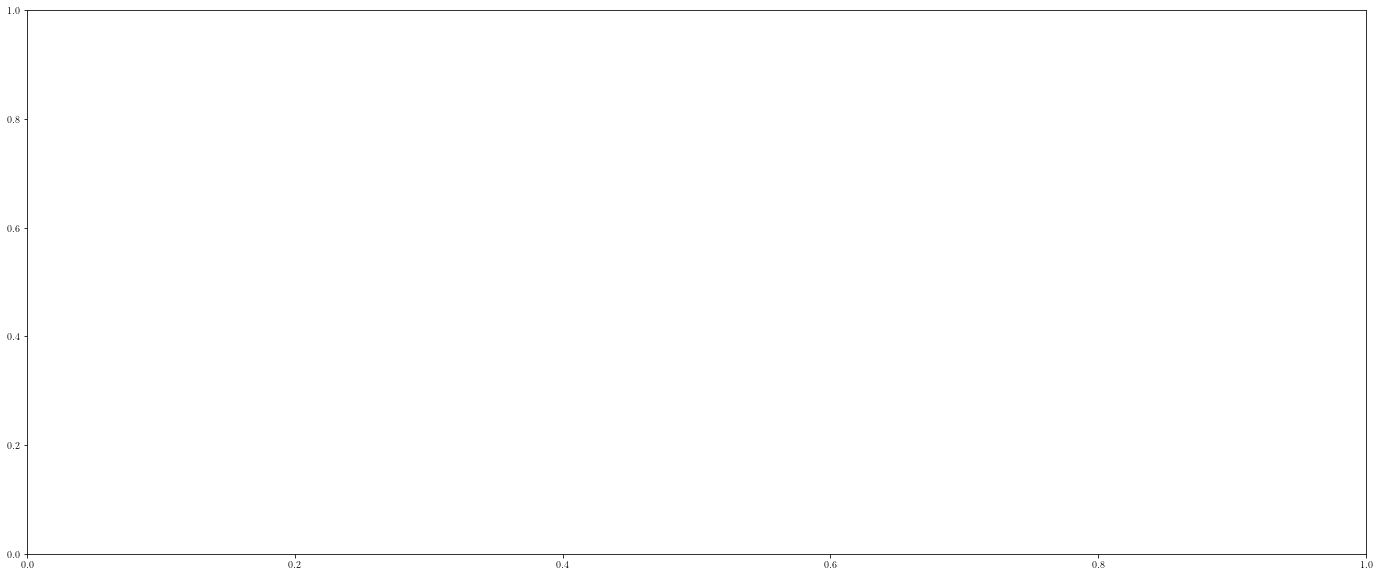

In [269]:
import sys

#temp plotting setup
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24,10)) 
ax1 = plt.subplot2grid((1,1), (0,0))
#end temp plottign setop


#Split numerical coarse into N training sets
N = 10
training_set = np.load('numerical_coarse.npy')
L = int(len(training_set) / N)  #length of a segment of coarse data

#Define the total time interval
T_seconds = Tint*365*24*3600
t = np.arange(0,T_seconds,1/fs)
Lt = int(len(t) / N) #length of a segment of high res data

#Load the high resolution data
full_set  = np.load('numerical_refined.npy')
analytical = np.empty_like(full_set)


crop_T = training_set[0:L+1,0]
crop_F = full_set[0:Lt+1,0]

print ('Final time, coarse = ', training_set[-1,0])
print ('Final time, NOhigh = ', full_set[-1,0])


sys.exit()
for i in range(1):
    print ('-------', i, '--------')
    #Slice the training set data
    subset = training_set[i*L : i*L + (L+1), :]
    
    #Slice the high resolution time
    t_subset = t[i*Lt : i*Lt + (Lt+1)]

    #Use this training set data to get a semi-analytical solution over the relevant time interval
    output = analytical_split(subset,t_subset,constants)
    
    
    #Some plotting
    
    #Plot X
    #ax1.plot(output[:,0], output[:,2])
    #ax1.plot(subset[:,0], subset[:,2])
    
    #Plot relative error 
    
    tN = full_set[i*Lt : i*Lt + (Lt+1),0]
    gN = full_set[i*Lt : i*Lt + (Lt+1),1]
    
    
    print ('e,t = ', output[0,0], output[0,1], output[-1,0], output[-1,1],tN[-1],gN[-1] )


   
    #ax1.plot(tN,gN)
    #ax1.plot(tN, (output[:,2] - gN)/gN)
    ax1.plot(tN, (output[:,1] - gN)/gN)
      
    
    #np.save('eccentricity_data.npy', subset)
    #np.save('eccentricity_dataHR.npy', full_set[i*Lt : i*Lt + (Lt+1),:])
    
    analytical[i*Lt : i*Lt + (Lt+1),:] = output

        

lim = 0.025
#ax1.set_ylim(-0.0125,0.0075)

Plotting the orbital parameter evolution
Plotting the orbital parameter evolution
[  0.78539816   0.78554498   0.78569176 ... 681.34053037 681.34083412
 681.34113792]
[  0.78539816   0.78554804   0.78569789 ... 681.49031819 681.49063059
 681.49094305]
[ 1.13086389e-15 -3.89463739e-06 -7.80365097e-06 ... -2.19794492e-04
 -2.19807077e-04 -2.19819693e-04]
The average percentage error in a was: 4.97644226414812e-05
LIM CHANGES


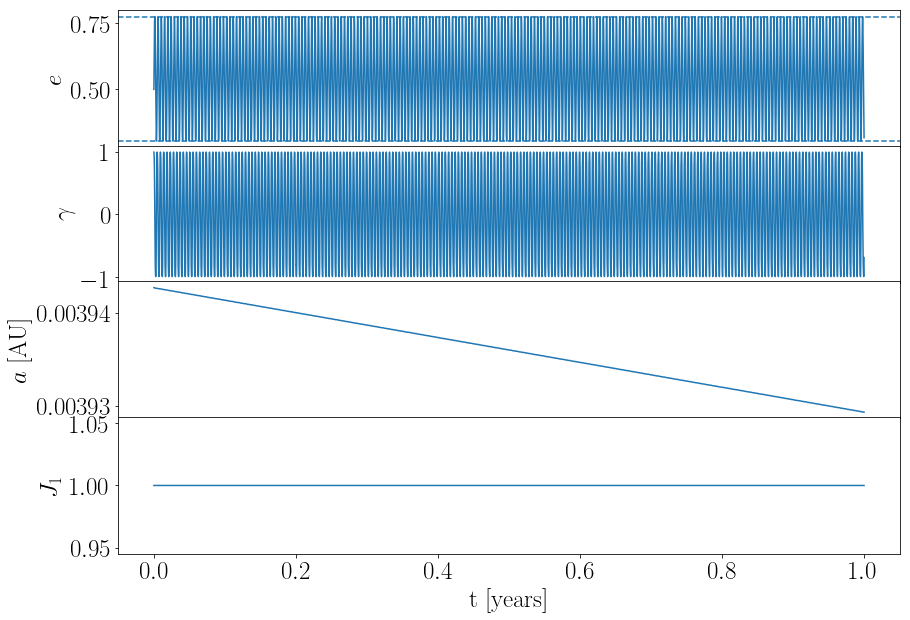

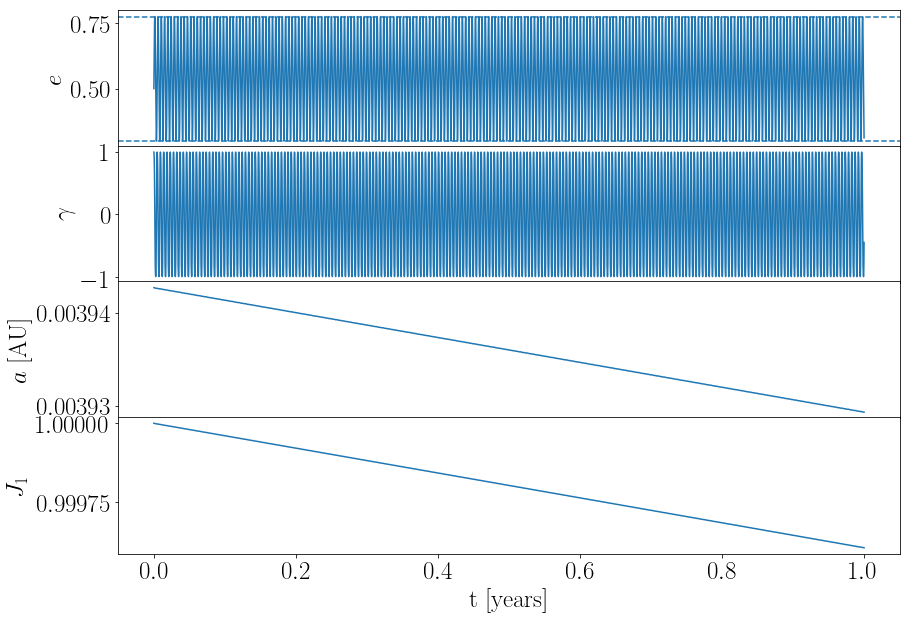

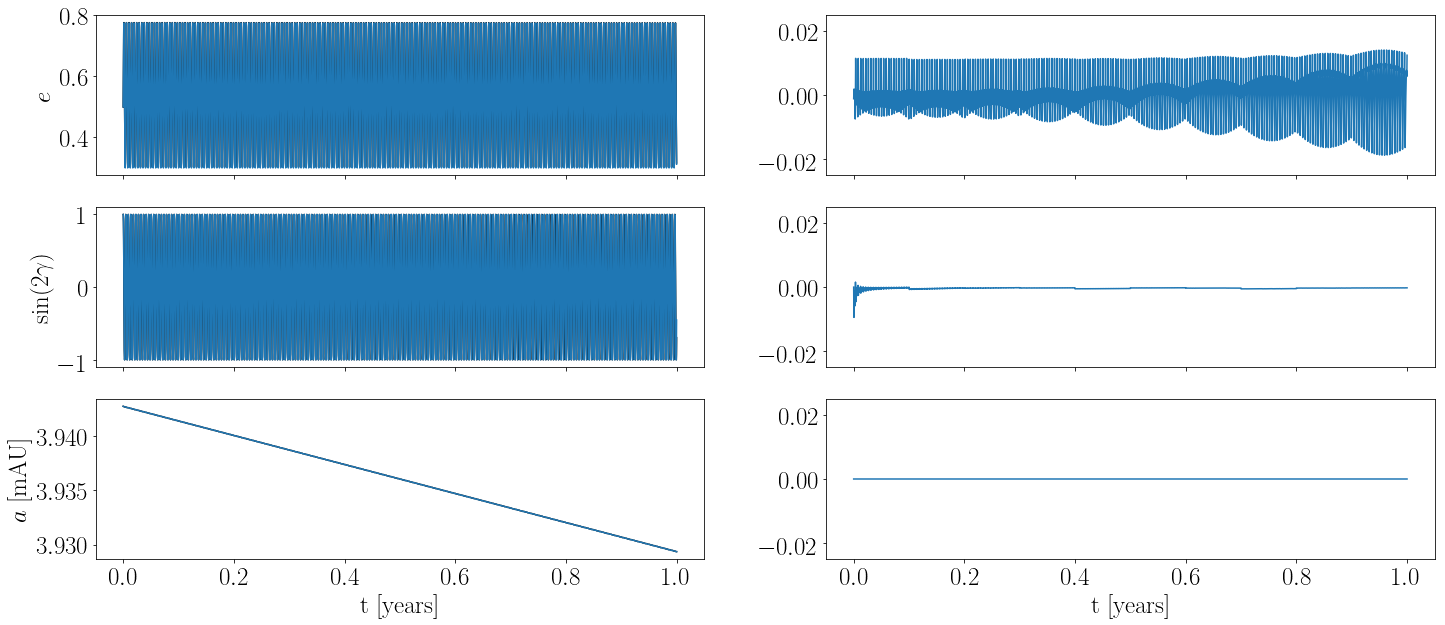

In [221]:
#Now plot and compare
plot_motion(analytical)
plot_motion(full_set)
plot_compare_motion(analytical,full_set)


In [222]:
import GravRadiation as GR
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
waveformNR = GR.Gwaves(full_set, constants)
waveformAN = GR.Gwaves(analytical, constants)

Getting the waveform
Mode sum. n =  1.0 20.0
Mode sum. n =  2.0 20.0
Mode sum. n =  3.0 20.0
Mode sum. n =  4.0 20.0
Mode sum. n =  5.0 20.0
Mode sum. n =  6.0 20.0
Mode sum. n =  7.0 20.0
Mode sum. n =  8.0 20.0
Mode sum. n =  9.0 20.0
Mode sum. n =  10.0 20.0
Mode sum. n =  11.0 20.0
Mode sum. n =  12.0 20.0
Mode sum. n =  13.0 20.0
Mode sum. n =  14.0 20.0
Mode sum. n =  15.0 20.0
Mode sum. n =  16.0 20.0
Mode sum. n =  17.0 20.0
Mode sum. n =  18.0 20.0
Mode sum. n =  19.0 20.0
Mode sum. n =  20.0 20.0
Getting the waveform
Mode sum. n =  1.0 20.0
Mode sum. n =  2.0 20.0
Mode sum. n =  3.0 20.0
Mode sum. n =  4.0 20.0
Mode sum. n =  5.0 20.0
Mode sum. n =  6.0 20.0
Mode sum. n =  7.0 20.0
Mode sum. n =  8.0 20.0
Mode sum. n =  9.0 20.0
Mode sum. n =  10.0 20.0
Mode sum. n =  11.0 20.0
Mode sum. n =  12.0 20.0
Mode sum. n =  13.0 20.0
Mode sum. n =  14.0 20.0
Mode sum. n =  15.0 20.0
Mode sum. n =  16.0 20.0
Mode sum. n =  17.0 20.0
Mode sum. n =  18.0 20.0
Mode sum. n =  19.0 20.0
M

Plotting the GW
Max h plus = 1.2623854965230435e-21
Plotting the GW
Max h plus = 1.5048421049093098e-21


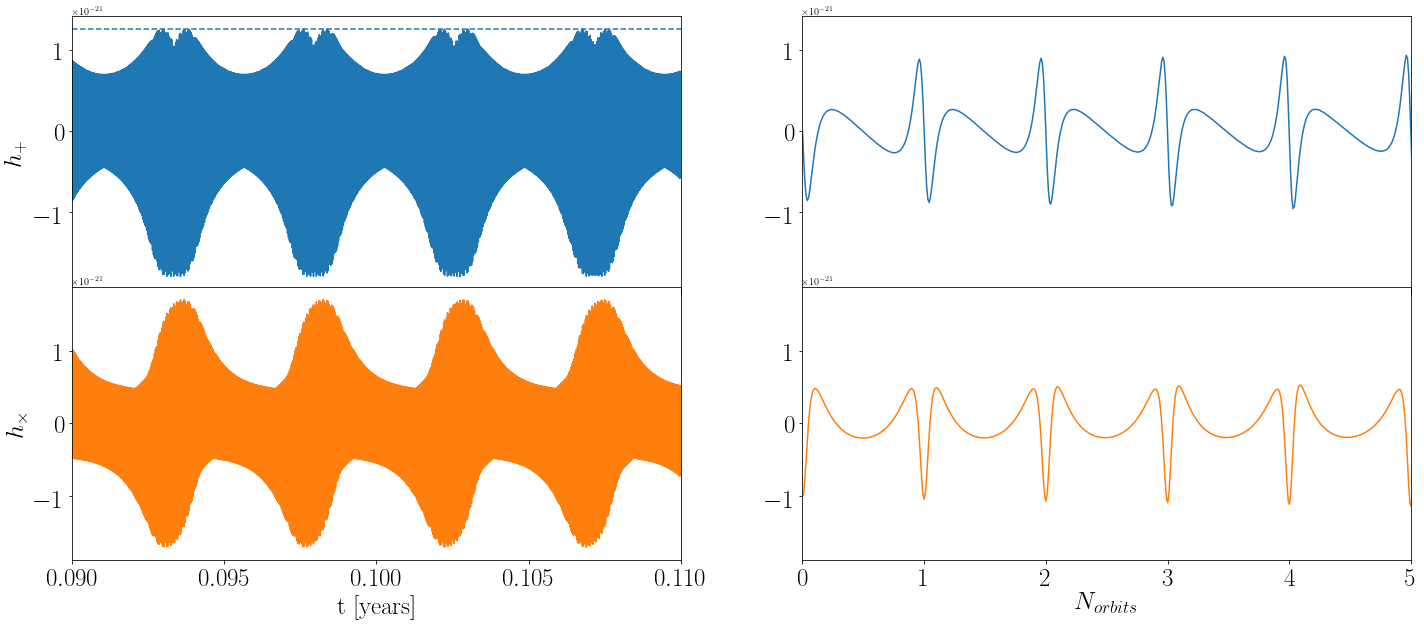

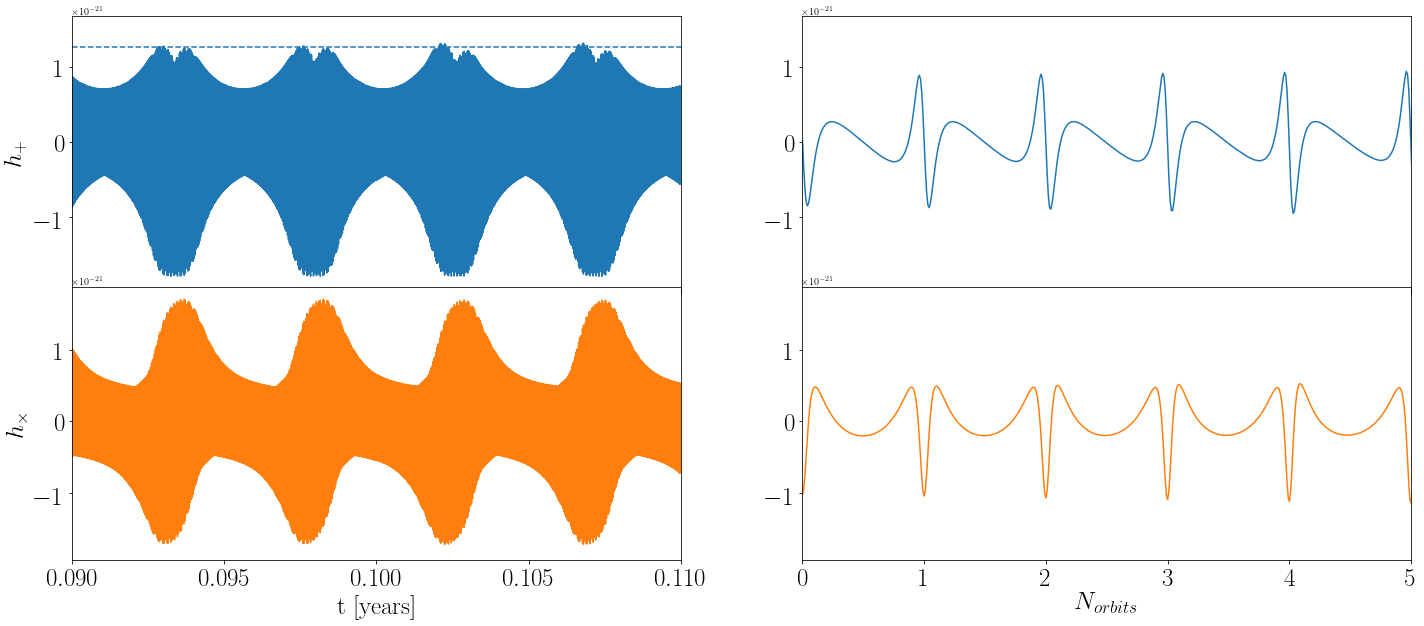

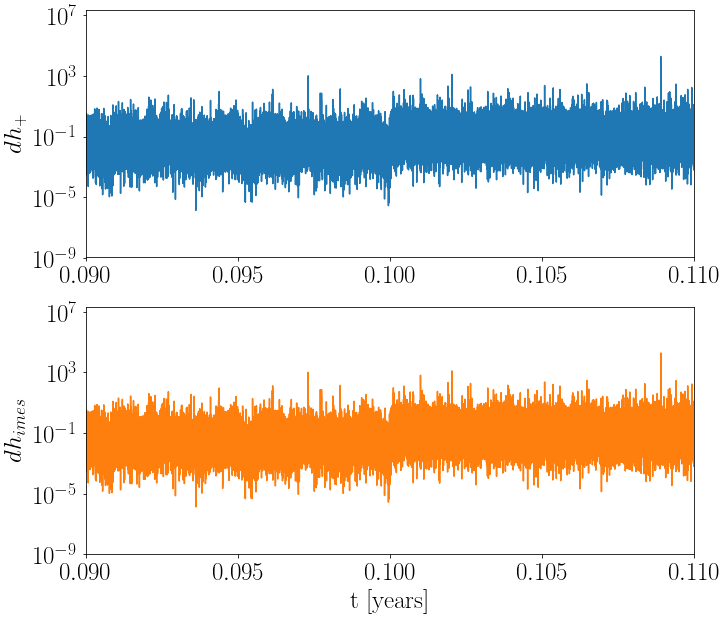

In [223]:
#Plot the GW waveforms
from plot import *
plot_GW(waveformNR,f1)
plot_GW(waveformAN,f1)
compare_GW(waveformNR,waveformAN)

In [224]:
#Go to frequency domain and get the overlap
f,h1,h2, S = GR.overlap(waveformNR,waveformAN)
#plot_GW_frequency(f,h1,h2, S)

overlap =  0.9256613547769309
